In [1]:
%matplotlib widget
import os
import argparse
import matplotlib
import numpy as np

from plantcv import plantcv as pcv
pcv.__version__

'3.14.2'

In [2]:
class options:
    def __init__(self):        
        self.image = "imgs/VIS_SV_0_z500_h1_g0_e82_380123_0.png" 
        self.debug = "plot"
        self.writeimg = False
        self.result = "data_output"
        self.outdir = "img_output"
args = options()
pcv.params.debug_outdir = args.outdir
pcv.params.debug = args.debug

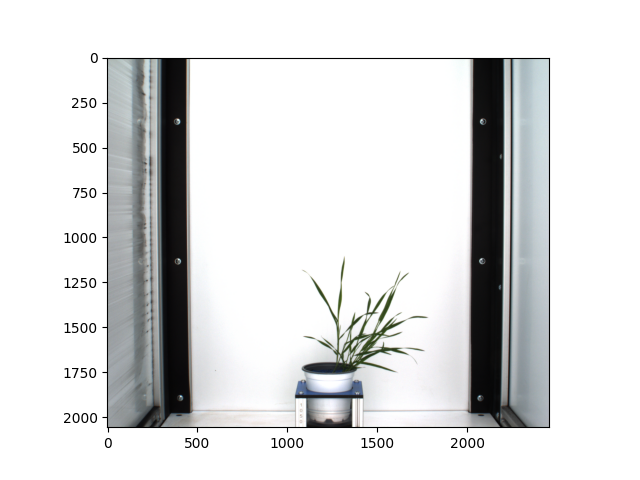

In [3]:
img, path, filename = pcv.readimage(filename=args.image)


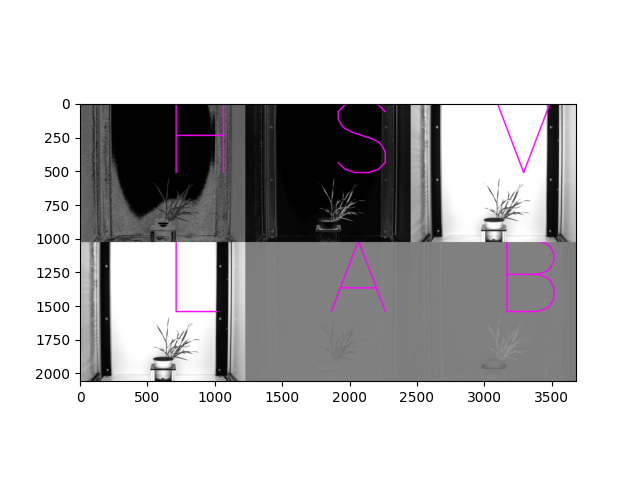

In [4]:
# Update params related to plotting so we can see better 
pcv.params.text_size = 50
pcv.params.text_thickness = 20

colorspace_img = pcv.visualize.colorspaces(rgb_img=img, original_img=False)


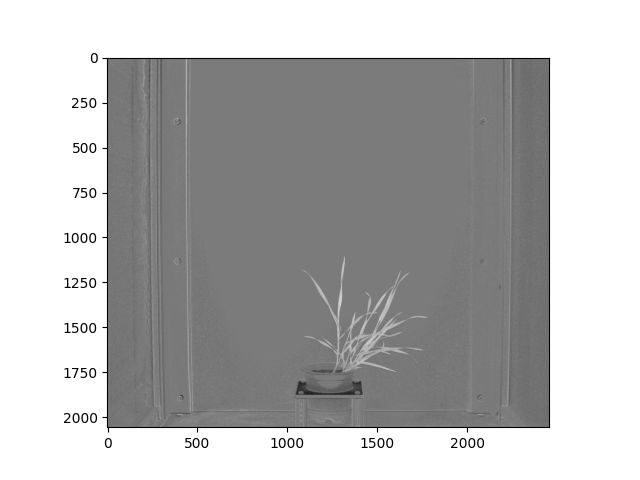

In [9]:
#### Create a mask and begin to clean it ####
# Change color space for plant extraction
a = pcv.rgb2gray_lab(rgb_img=img, channel="b")


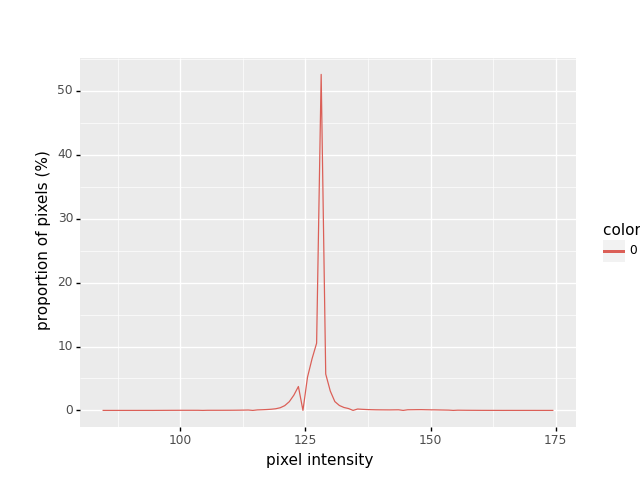

In [10]:
hist = pcv.visualize.histogram(img=a, bins=100)

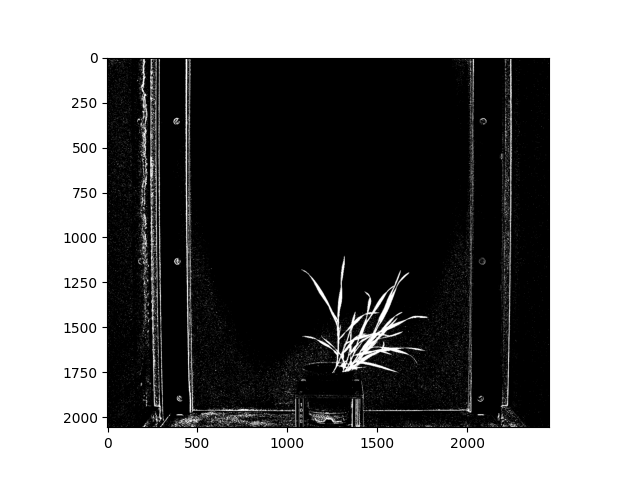

In [13]:
# Threshold
a_thresh = pcv.threshold.binary(gray_img=a, threshold=130, max_value=255, object_type='light')


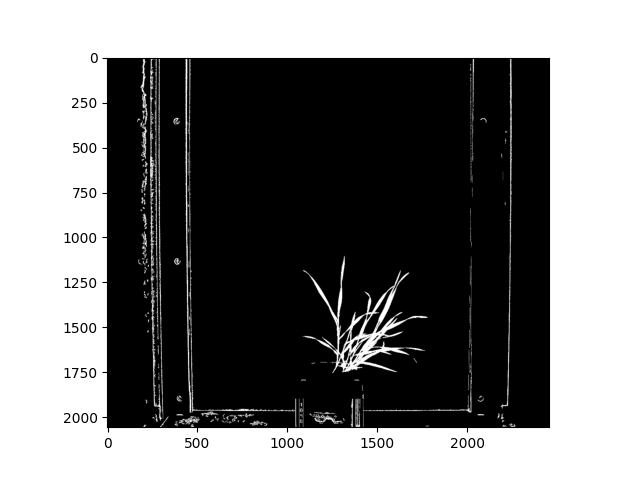

In [14]:
# Fill in small objects 
a_fill_image = pcv.fill(bin_img=a_thresh, size=50)


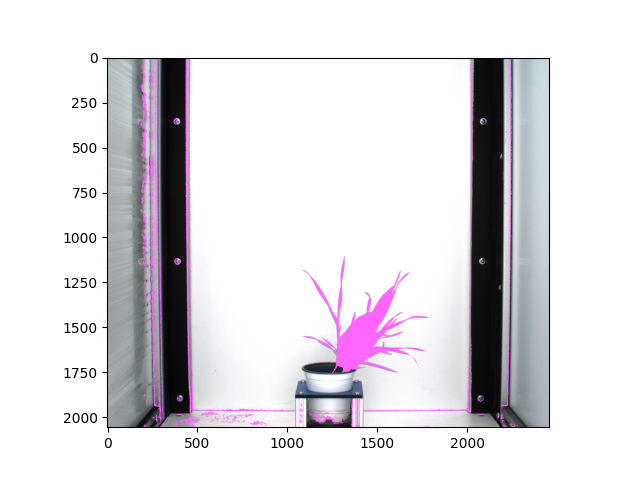

In [17]:
#find objects
obj, obj_hierarchy = pcv.find_objects(img=img, mask=a_fill_image)

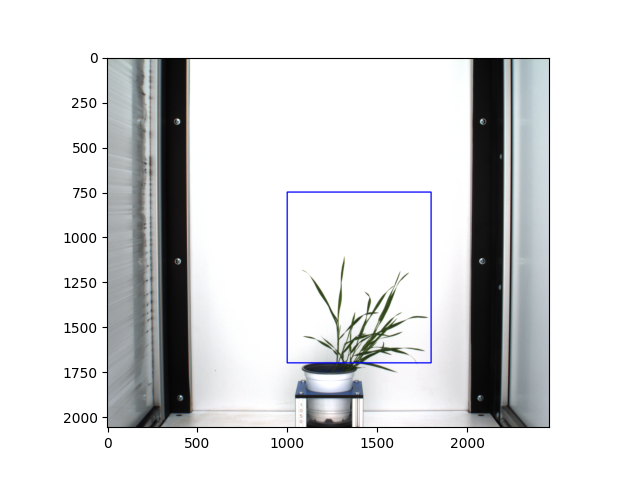

In [25]:
# define region of interest

roi1, roi_hierarchy= pcv.roi.rectangle(img=img, x=1000, y=750, h=950, w=800)


/srv/conda/envs/notebook/lib/python3.7/site-packages/plantcv/plantcv/plot_image.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


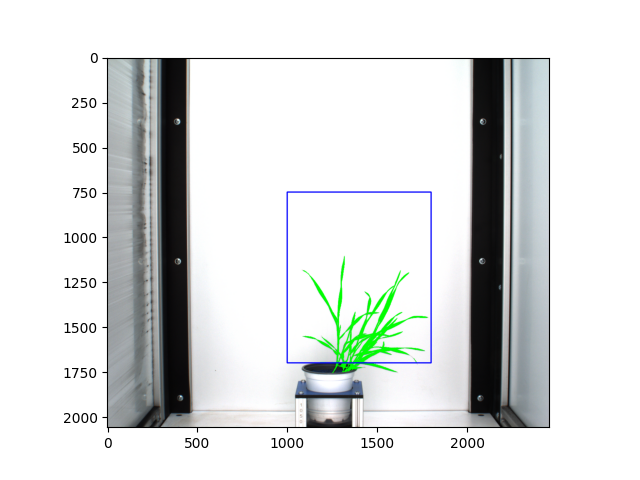

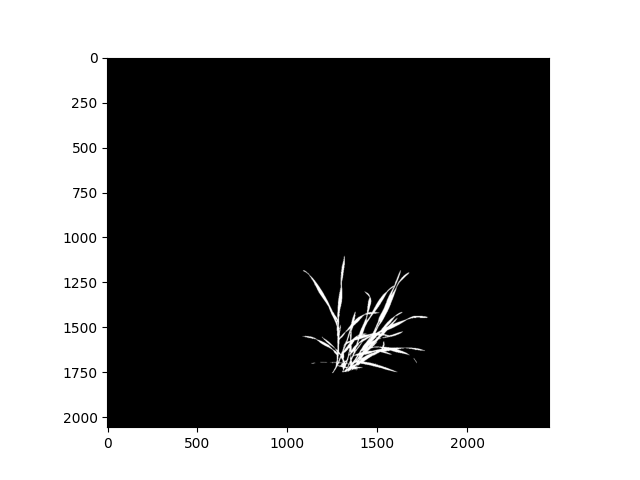

In [26]:
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                               roi_hierarchy=roi_hierarchy, 
                                                               object_contour=obj, 
                                                               obj_hierarchy=obj_hierarchy,
                                                               roi_type='partial')

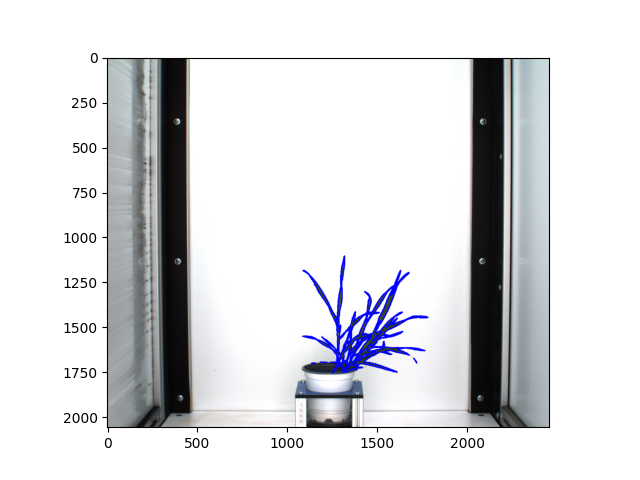

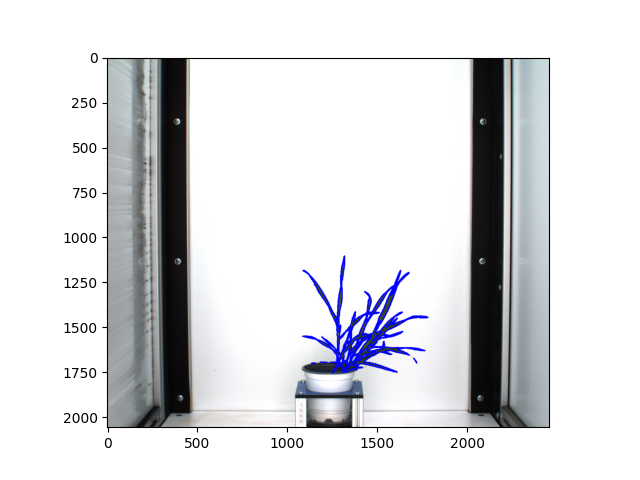

In [27]:
# Object combine kept objects

# Inputs:
#   img - RGB or grayscale image data for plotting 
#   contours - Contour list 
#   hierarchy - Contour hierarchy array 
obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

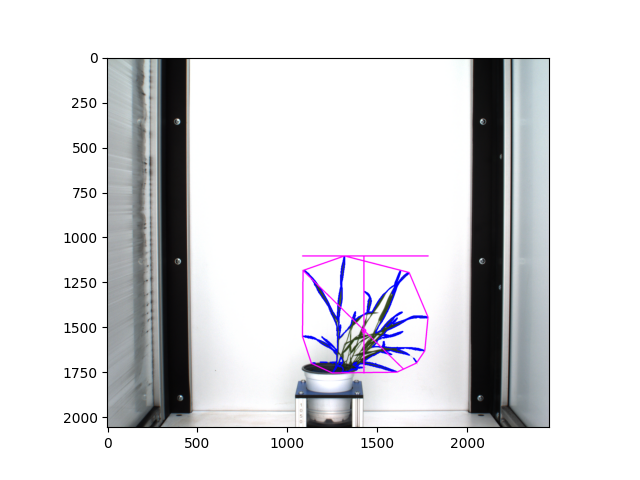

In [28]:
############### Analysis ################ 
  
# Find shape properties, data gets stored to an Outputs class automatically

# Inputs:
#   img - RGB or grayscale image data 
#   obj- Single or grouped contour object
#   mask - Binary image mask to use as mask for moments analysis 
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

analysis_image = pcv.analyze_object(img=img, obj=obj, mask=mask, label="de

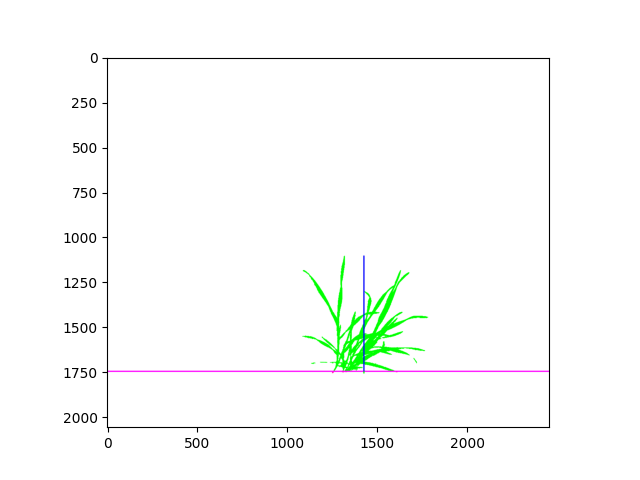

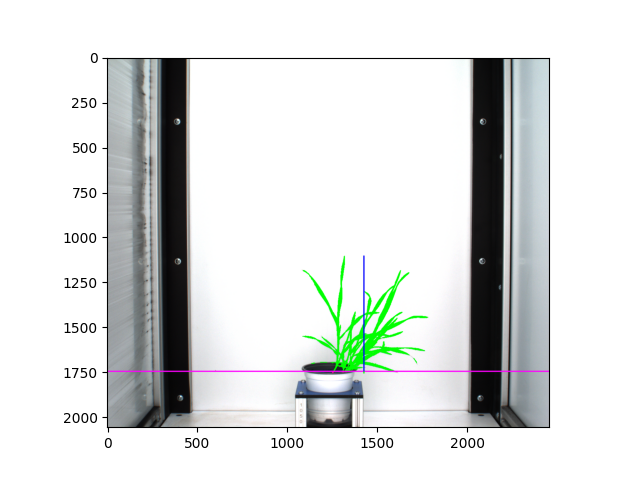

In [29]:
# Shape properties relative to user boundary line (optional)

# Inputs:
#   img - RGB or grayscale image data 
#   obj - Single or grouped contour object 
#   mask - Binary mask of selected contours 
#   line_position - Position of boundary line (a value of 0 would draw a line 
#                   through the bottom of the image) 
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

boundary_image2 = pcv.analyze_bound_horizontal(img=img, obj=obj, mask=mask, 
                                               line_position=1750, label="default")

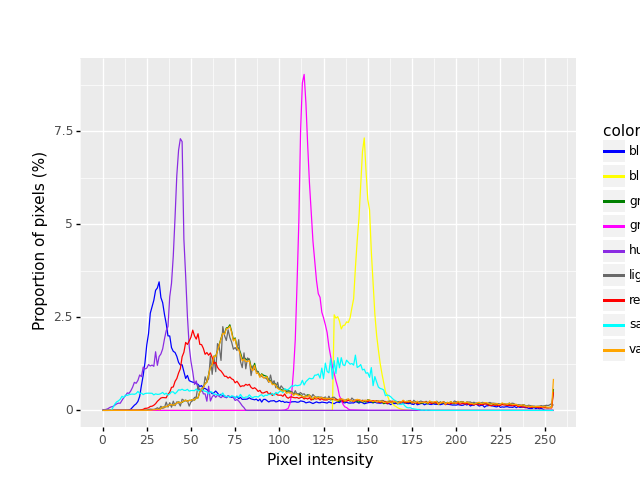

In [30]:
# Determine color properties: Histograms, Color Slices and Pseudocolored Images, output color analyzed images (optional)

# Inputs:
#   rgb_img - RGB image data
#   mask - Binary mask of selected contours 
#   colorspaces - 'all' (default), 'rgb', 'lab', or 'hsv'
#                 This is the data to be printed to the SVG histogram file  
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)

color_histogram = pcv.analyze_color(rgb_img=img, mask=kept_mask, colorspaces='all', label="default")

In [31]:
# pcv.print_results(filename=args.result)
pcv.outputs.save_results(filename=args.result)